数据来源：Firefox Lockwise 密码管理器。我从2019年清明节（一个重要的日子）开始使用 Firefox，此前的数据大概来自老 Microsoft Edge 导入。

2019年后，我登录过的账号大部分会收录（但少数，比方青春北京，只在微信里登录，就没有收录）。收录的不止我一个人的账号，还有的是家母（密码很好猜，家母的账号当然能为我享用）、两位朋友的。不难想象，朋友借用电脑时留下的账号会常年用不上。

还有些账号属于局域网、以前的域名上的服务，绝对再也用不上了。我没有删除它们，因为它们能让我想起以前折腾的各种服务。这回懒得统计了，以后看着办吧。

In [72]:
import pandas as pd

def dateparse(time_in_secs):
    return datetime.datetime.fromtimestamp(float(time_in_secs))

df = pd.read_csv('登录信息.csv', usecols=[0,1,2,6,7,8])

# https://stackoverflow.com/questions/34122395/reading-a-csv-with-a-timestamp-column-with-pandas
df['timeCreated'] = pd.to_datetime(df['timeCreated'], unit='ms')
df['timeLastUsed'] = pd.to_datetime(df['timeLastUsed'], unit='ms')
df['timePasswordChanged'] = pd.to_datetime(df['timePasswordChanged'], unit='ms')
odf = df.copy()
odf[df.columns[[0,3,4,5]]].head()

C:\Users\90895\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\tools\datetimes.py:557: RuntimeWarning: invalid value encountered in cast
  arr, tz_parsed = tslib.array_with_unit_to_datetime(arg, unit, errors=errors)


,url,timeCreated,timeLastUsed,timePasswordChanged
0,http://gkbm.cdzk.org,2021-10-09 14:33:20,2022-06-24 05:53:20,2021-10-09 14:33:20
1,https://ak.hypergryph.com,2021-11-02 05:13:20,2021-11-05 16:33:20,2021-11-02 05:13:20
2,http://config.mail.163.com,2021-02-07 15:00:00,2021-11-05 16:33:20,2021-02-07 15:00:00
3,https://www.luogu.com.cn,2019-12-10 06:40:00,2021-11-05 16:33:20,2019-12-10 06:40:00
4,http://www.psy.com.cn,2019-07-24 14:53:20,2021-11-05 16:33:20,2019-07-24 14:53:20


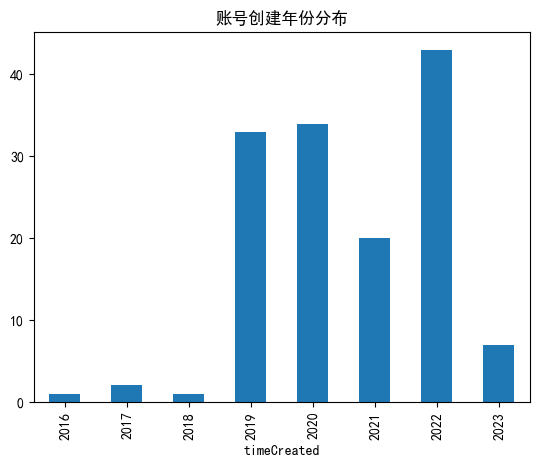

In [73]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']

df['timeCreated'].groupby(df['timeCreated'].dt.year).count().plot(kind='bar')
plt.title('账号创建年份分布')
plt.show()

很容易看出，高中之后账号注册显然增多了。

我个人注册账号非常谨慎，所以以上数字虚高成分过多，我们细细看。我瞟了眼 Firefox 自带的按修改时间（近似注册时间，考虑我几乎不改密码）排序，主要增多的账号有：

2019：

* 学校官网、网课、查分（电脑是当时的稀缺品，我帮不少心急的同学查过分）、心理测试（夏令营时）、作文批改、综合素质评价、内网网盘（！）等网站，初中可没这些破事。每个网站又往往有多个朋友的账号。我自己的账号约8个。（我必须诚实地指出，心理测试的账号是顺序编号，我趁机看了别人的结果，造成了账号数量虚高——幸而现在账号数据已经作古，看到了啥，甚至自己的结果，我现在也真的全忘光了。）
* 朋友的 Github、洛谷、Screeps 账号（什么朋友），还有 Steam、bilibili 等。不是我的账号大约（这么说，是因为我也认不清哪个是我的了）12个。
* 老帐号（MS，Google，163、QQ邮箱，家母的网盘、优酷）纳入管理。
* 注册了 Github、Minecraft Mojang、Spotify 账号（废弃）。

2020：

* 一大堆局域网账户和内网穿透临时域名账户（9个）；
* 注册洛谷（我也来了！）、阿里云、花生壳、Gentoo Wiki（基本废弃）、ll论坛。
* 别的就是老账号纳入管理和朋友的账号了。

2021：

* 减少了，因为朋友没怎么用我电脑了（哭笑不得）；
* 为申请大学注册了了两个账号（可惜没用）；
* glot.io、docker.io、vultr 等新账号照样主要用于开发，还有个娱乐用的 Beatstage。

2022：

* 校测多邻国考试；高考志愿填报；大学又有了大学的系列账号（SSO、智慧树、智慧团建）；
* 为了领取大学生福利注册的账户，比如 Jetbrains、Azure；
* 我注册账户的心态似乎变了，注册了很多有趣的服务（OSM、namesilo、last.fm），也肯为了资源放下身段了（城通网盘、爱发电、各种琴谱小站）。

2023：

* 三星账户；

可以看出，以上账号增加的原因不可一概而论。除了局域网易于识别，账号归属和公私很难识别（除非有个独特的密码后缀）。误差的另一大来源是一个账号在多个域名登录、分别用邮箱和用户名登录会产生多条记录。

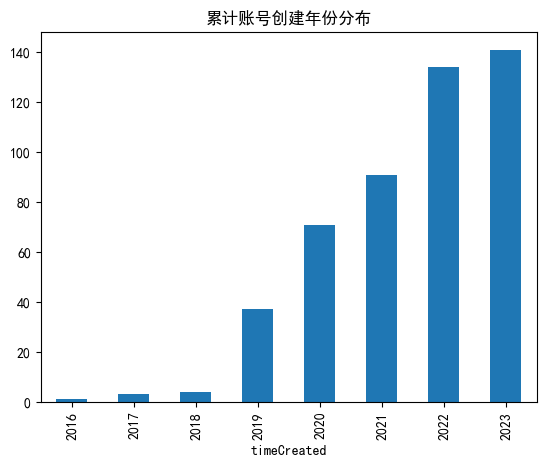

In [74]:
# accumulated account plot
df['timeCreated'].groupby(df['timeCreated'].dt.year).count().cumsum().plot(kind='bar')
plt.title('累计账号创建年份分布')
plt.show()

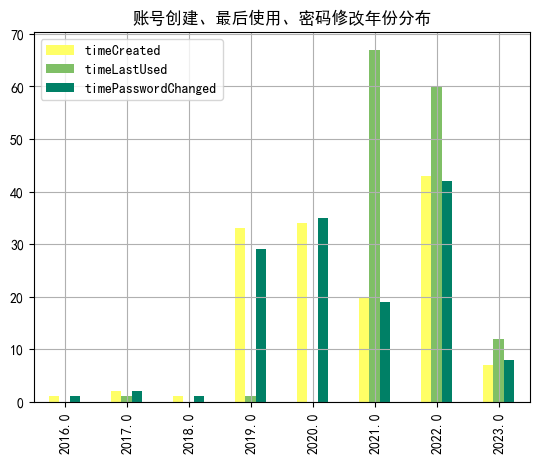

In [75]:
# df['timeCreated'].groupby(df['timeCreated'].dt.year).count()
# df['timeLastUsed'].groupby(df['timeLastUsed'].dt.year).count()
# df['timePasswordChanged'].groupby(df['timePasswordChanged'].dt.year).count()

# combine into one dataframe
ndf = pd.concat([df['timeCreated'].groupby(df['timeCreated'].dt.year).count(),
                df['timeLastUsed'].groupby(df['timeLastUsed'].dt.year).count(),
                df['timePasswordChanged'].groupby(df['timePasswordChanged'].dt.year).count()], axis=1)
ndf.columns = ['timeCreated', 'timeLastUsed', 'timePasswordChanged']
ndf.plot(kind='bar', grid = True, colormap = 'summer_r')
plt.title('账号创建、最后使用、密码修改年份分布')
plt.show()

我没有刻意绘图展示有几成账号的密码从来没改过，不过从黄色和深绿的条条相差无几的高度

大部分账号高二起还在使用，这是健康的——如果我大二大三时这些还是死账号，那就值得反思了。

我修改过密码的，应该是最重要的一批账号。MS 推出无密码登录后我迅速采用，Firefox Account 的密码我也于大一修改。

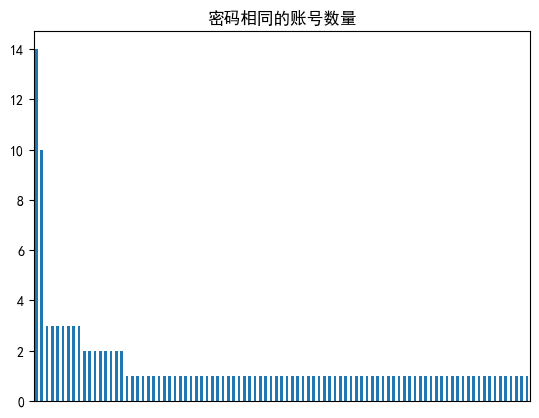

In [76]:
# chart of account with the same password
df['password'].value_counts().plot(kind='bar')
# not show x axies
plt.xticks([])
plt.title('密码相同的账号数量')
plt.show()

2019年10月22日首次发布的 Firefox 70（[Release Note](https://www.mozilla.org/en-US/firefox/70.0/releasenotes/)）支持生成随机密码（久远的回忆！）。

小声地说：我偷偷瞥了眼X轴，第一条是我最常用的密码，第二条是家母最常用的密码，第三和第四则分别是我们最常用密码的变体。后面的就看不清了……

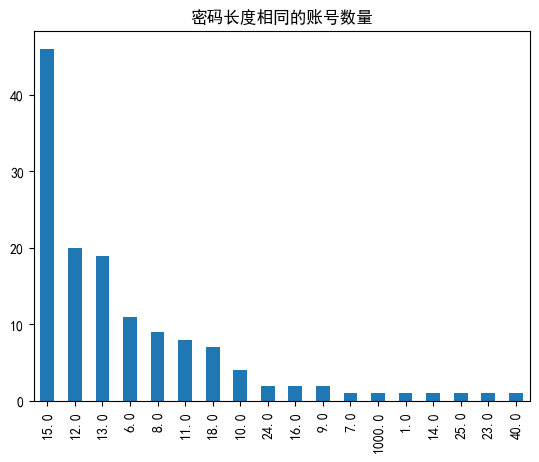

In [77]:
# chart of account with the same password length
df['password'].str.len().value_counts().plot(kind='bar')
plt.title('密码长度相同的账号数量')
plt.show()

15位是 Firefox 生成的，12位是我的，13位是家母的。别的就不懂了。

那个1000位数的我看了眼，网址是 chrome://FirefoxAccounts，用户名是串哈希，密码是个 JSON，和 Mozilla 同步服务有关。干嘛的，谁知道呢……

40位的是 Azure 应用服务的 CI 管理密钥，甭想。真人快打我也吐不出来，因为不是我编的。

别的长密码（20多位的）多半是较长密码加了个较长后缀。

我懒得分析和密码强度有关的更多数据，文本数字符号混合，后缀，常用密码（114514，这个可以说，因为我不用）之类的。

总结也没什么好总结的，数据失真的原因上面分析了，我也不觉得需要改密码、立即注销账户啥的。跟着密码专家的建议，用强主密码、多生成密码总是正确的。

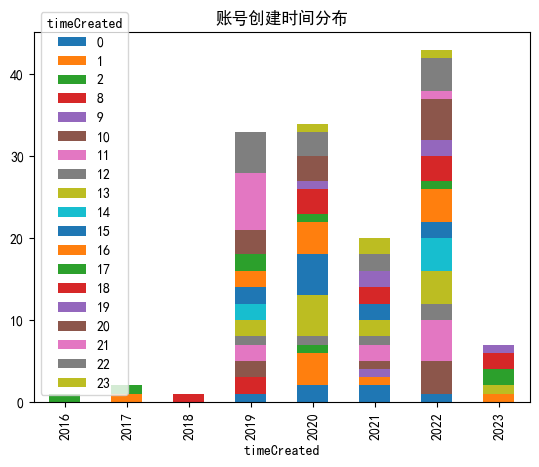

In [88]:
# scatter plot of what am/pm I created account across the years
df['timeCreated'].groupby([df['timeCreated'].dt.year, (df['timeCreated'].dt.hour + 8)%24]).count().unstack().plot(kind='bar', stacked=True)
plt.title('账号创建时间分布')
plt.show()

最后这张图是研究我生活规律性的。我很遗憾没法画 Stephen Wolfram 那样美丽的散点图，他能用点的数量而非条带高度表示账号多少。

2020年真是不健康啊，两点了还有新账号创建。

这图真是丑，我也看不出别的信息了。